# Midterm1 - Part B
## Gabe Wallon

## General Instructions

Worth 80 points

Exam 1 is broken down into two parts:

* Part A: (Synchronous) Multiple Choice Questions (MCQs) - 20% of the score - This in-class quiz will unlock on Feb 22nd from 3:30 to 4:05 pm.
* Part B: (Asynchronous) Theoretical Questions & Coding - 80% of the score - This take-home exam will unlock on Feb 22nd from 4.05 to Feb 23rd at 7.00 pm.

This exam is open resources but **Individual**.

* You may use any course materials (slides, textbooks, etc.).
* You may not be able to consult with other humans. DO NOT RISK THIS.
* You may not use any kind of AI Chatbots for assistance - this will be checked.


**Exam 1: Part B**

This is a take-home Exam. It will unlock on Thursday, February 22nd at 4:05 PM MST and will be due on Friday, February 23rd at 7:00 PM MST. The part is out of a total of 80 Points. Please adhere to the below-mentioned instructions:

* Use this Jupyter Notebook template to complete your Part B.
* Submit one PDF file per question.
* Add your code (Jupyter Notebook file) and CSV File is apply.
* Datasets For QB2 and B3 must to be downlaoded from Canvas. For your information(FYI): Canvas cannot preview .csv, zip, or .xlsx files.

  * B.2: covid-19_datasets.zip
  * B.3: MidTerm1_PartB3_Data.xlsx,   MidTerm1_PartB3_Data.csv


Late Submission Policy: *Late Submissions are accepted until 8:59 pm, but they will be penalized with 15 points.*

## B1. Data Collection (30 points)

---
For this question, follow the below mentioned instructions clearly:

* Make an HTTP GET request to the Course Catalog website (https://catalog.colorado.edu/courses-a-z/)
* Use webscraping to parse the HTML content.
* First, get a list of all the departments in the catalog. Retrieve course code for each department and convert it into lowercase for further use.
* Next, use the department code to access the list of courses offered by that department. For example, use https://catalog.colorado.edu/courses-a-z/appm/ to access the course list of Applied Mathematics department and so on. Do this for all the departments.
* After accessing the course list, locate and extracts data such as Course Name, Number of credits, Course Code, Requisites and Description.
* Finally, create a DataFrame from the extracted data, display it and save it a CSV file.
* Submit the CSV file when submitting the exam.
* <b> Note: We will deduct 5 points if you print the entire html output. If you want to show the output then print only a fraction of it.</b>

#### GUIDELINES:

* Use Python and a suitable web scraping library to extract data from the website.
* Navigate through the website's structure to locate and extract relevant information about courses.
* Pay attention to the HTML structure and tags containing the required data.
* You will have to iterate through the department code and request the course list to extract information.

In [1]:
## ADD REQUIRED IMPORTS ##
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [3]:
## GET DEPARTMENT LIST AND DISPLAY IT ##
url = 'https://catalog.colorado.edu/courses-a-z/'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

In [36]:
dept_idx = soup.find('div', {'id':'atozindex'})
all_depts = dept_idx.find_all('a')

dept_lst = []
for d in all_depts:
    if 'href' in d.attrs:
        name = d.string
        code = re.findall(r'\(.*?\)', name)[0][1:-1].lower()
        link = 'https://catalog.colorado.edu' + d['href']
        dept_lst.append((name,code,link))

In [155]:
for name,code,link in dept_lst:
    print(name)

Accounting (ACCT)
Advertising, PR and Media Design (APRD)
Aerospace Engineering (ASEN)
Air Force Aerospace Studies - ROTC (AIRR)
Anthropology (ANTH)
Applied Math (APPM)
Arabic Languages (ARAB)
Architectural Engineering (AREN)
Architecture (ARCH)
Art Film Studies (ARTF)
Art History (ARTH)
Arts and Sciences Courses (ARSC)
Art Studio and Non-Studio (ARTS)
Asian Studies (ASIA)
Astrophysical and Planetary Sciences (ASTR)
ATLAS (ATLS)
Atmospheric and Oceanic Sciences (ATOC)
Baker Residential Academic Program (BAKR)
BCOR Applied Semester Experience (BASE)
Biochemistry (BCHM)
Biomedical Engineering (BMEN)
Business Administration (BADM)
Business Core (BCOR)
Business Environment and Policy (BPOL)
Business Law (BSLW)
Business Minor (BUSM)
Career Services (CSVC)
Center for Western Civilization (CWCV)
Center of the American West (CAMW)
Central and East European Studies (CEES)
Chemical Engineering (CHEN)
Chemistry (CHEM)
Chinese (CHIN)
Cinema Studies & Moving Image Arts (CINE)
Civil Engineering (CVE

In [149]:
# initialize a dataframe
coursedf = pd.DataFrame({'Department Code':[], 'Course Name': [], 'Course Code':[], 
                   'Credit Hours':[], 'Course Description': [], 'Prerequisites':[]})

In [150]:
## ITERATE THROUGH DEPARTMENT LIST AND RETRIEVE COURSE INFORMATION FOR EACH DEPARTMENT ##

for d_name, d_code, d_link in dept_lst:
    d_page = requests.get(d_link)
    d_soup = BeautifulSoup(d_page.content, "html.parser")
    courses = d_soup.find('div', {'class':'sc_sccoursedescs'})
    
    for c in courses.find_all('div'):    
        # finding course code
        class_code = c['data-coursecode']

        p_tags = c.find_all('p')

        # finding course name
        class_name = p_tags[0].find('strong').string

        # finding credit hours
        if isinstance(class_name,str):
            credit_hours = re.findall(r'\(.*?\)', class_name)[0][1:-1]

        # finding course description
        description = p_tags[1].contents[0].strip()

        # finding prerequisites
        pre_reqs = []
        for pre in c.find_all('a'):
            s = pre.string
            pre_reqs.append(s[:4] + ' ' + s[-4:])

        c_info = [d_code, class_name, class_code, credit_hours, description, pre_reqs]
        coursedf.loc[len(coursedf.index)] = c_info

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:809: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [154]:
## CREATE A DATAFRAME OF THE SCRAPED DATA, DISPLAY IT AND SAVE IT TO CSV ##
coursedf.to_csv('cu_boulder_courses.csv')
coursedf.head(10)

,Department Code,Course Name,Course Code,Credit Hours,Course Description,Prerequisites
0,acct,ACCT 3220 (3) Corporate Financial Reporting 1,ACCT 3220,3,First of a two-course sequence intended to pro...,[BASE 2104]
1,acct,ACCT 3225 (6) Corporate Financial Reporting,ACCT 3225,6,Intended to provide students with increased fl...,"[ACCT 3220, ACCT 3230, BASE 2104]"
2,acct,ACCT 3230 (3) Corporate Financial Reporting 2,ACCT 3230,3,Second in a two-course sequence building and e...,[ACCT 3220]
3,acct,ACCT 3320 (3) Cost Management,ACCT 3320,3,Provides cost analysis for the support of mana...,[BASE 2104]
4,acct,ACCT 3440 (3) Income Taxation of Individuals,ACCT 3440,3,Provides an overview of individual US federal ...,[BASE 2104]
5,acct,ACCT 3700 (3) Accounting in a Global Economy,ACCT 3700,3,This London-based global seminar introduces un...,[ACCT 3220]
6,acct,ACCT 4240 (3) Advanced Financial Accounting,ACCT 4240,3,Examines advanced financial accounting theory ...,"[ACCT 5240, ACCT 3220, ACCT 3230, ACCT 3225]"
7,acct,ACCT 4250 (3) Financial Statement Analysis,ACCT 4250,3,Focuses on the use of U.S. and international a...,"[ACCT 5250, ACCT 3220, 3225 3225, ACCT 3230]"
8,acct,ACCT 4540 (3) Accounting Information Systems,ACCT 4540,3,Considers the interaction of accountants with ...,"[ACCT 5540, ACCT 3220, ACCT 3225]"
9,acct,ACCT 4620 (3) Auditing and Assurance Services,ACCT 4620,3,"Emphasizes the value of assurance services, in...","[ACCT 5620, ACCT 3230]"


## B2. Data Visualization: From epidemic to pandemic (25 points)



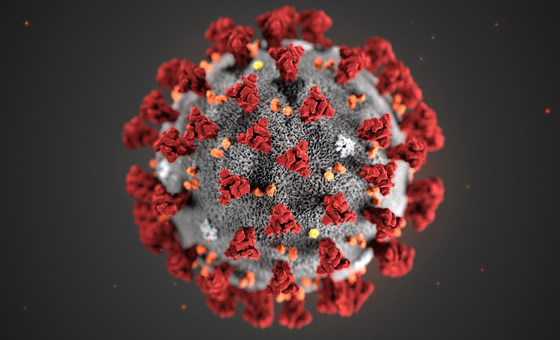



In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy.

We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. But, how quickly did the virus spread across the globe? And, can we see any effect from country-wide policies, like shutdowns and quarantines?

Fortunately, organizations around the world have been collecting data so that governments can monitor and learn from this pandemic. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a [publicly available data repository](https://github.com/RamiKrispin/coronavirus) to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries. You can use this dataset as optional, however you must to use the dataset provided on Canvas.

In this notebook, you will visualize COVID-19 data from the first several weeks of the outbreak to see at what point this virus became a global pandemic.
Please note that information and data regarding COVID-19 is frequently being updated. The data used in this project was pulled on March 17, 2020, and should not be considered to be the most up to date data available.

In [2]:
# Your Code Here - Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

In [18]:
# Read Covid19_datasets/confirmed_cases_worldwide.csv into confirmed_cases_worldwide
confirmed_cases_worldwide = pd.read_csv('../data/confirmed_cases_worldwide.csv')
confirmed_cases_worldwide.shape

(56, 2)

### B2.1 Confirmed cases throughout the world


The table confirmed_cases_worldwide shows the cumulative confirmed cases of COVID-19 worldwide by date. Just reading numbers in a table makes it hard to get a sense of the scale and growth of the outbreak. Please draw a line plot to visualize the confirmed cases worldwide.

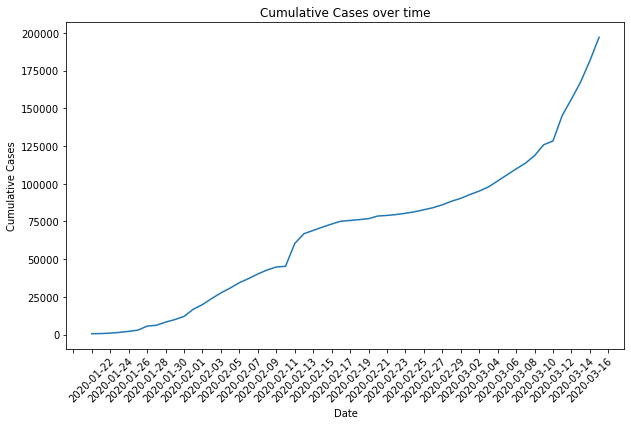

In [4]:
#You code here
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

x = confirmed_cases_worldwide.date
y = confirmed_cases_worldwide.cum_cases

plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases over time')

ax = plt.gca()
n = len(x) // 20
ax.xaxis.set_major_locator(MultipleLocator(n))

plt.show()

In [ ]:

# fig, ax = plt.subplots()
# fig.figsize=(10,6)

# sns.lineplot(data=confirmed_cases_worldwide, x="date", y="cum_cases")
# sns.set(rc={'figure.figsize':(10,6)})

### B2.2 China compared to the rest of the world

The y-axis in that plot is pretty scary, with the total number of confirmed cases around the world approaching 200,000. Beyond that, some weird things are happening: there is an odd jump in mid February, then the rate of new cases slows down for a while, then speeds up again in March. We need to dig deeper to see what is happening.

Early on in the outbreak, the COVID-19 cases were primarily centered in China. Let's plot confirmed COVID-19 cases in China and the rest of the world separately to see if it gives us any insight.

We'll build on this plot in future tasks. One thing that will be important for the following tasks is that you add aesthetics within the line geometry of your ggplot, rather than making them global aesthetics.

In [27]:
# Read in Covid19_datasets/confirmed_cases_china_vs_world.csv in confirmed_cases_china_vs_world

confirmed_cases_china_vs_world = pd.read_csv('../data/confirmed_cases_china_vs_world.csv')
china_data = confirmed_cases_china_vs_world.loc[confirmed_cases_china_vs_world['is_china']=='China']
restworld_data = confirmed_cases_china_vs_world.loc[confirmed_cases_china_vs_world['is_china']!='China']

In [20]:
china_data.shape

(56, 4)

In [22]:
restworld_data.shape

(56, 4)

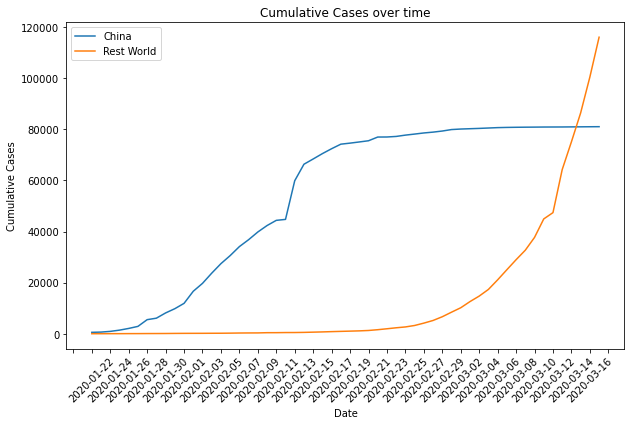

In [25]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

x1 = china_data.date
y1 = china_data.cum_cases
y2 = restworld_data.cum_cases

plt.plot(x1,y1, label='China')
plt.plot(x1,y2, label='Rest World')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases over time')
plt.legend()

ax = plt.gca()
n = len(x1) // 20
ax.xaxis.set_major_locator(MultipleLocator(n))

plt.show()

### B2.3 Add annotations to your plot!

In February, the majority of cases were in China. That changed in March when it really became a global outbreak: around March 14, the total number of cases outside China overtook the cases inside China. This was days after the WHO declared a pandemic.

There were a couple of other landmark events that happened during the outbreak. For example, the huge jump in the China line on February 13, 2020 wasn't just a bad day regarding the outbreak; China changed the way it reported figures on that day (CT scans were accepted as evidence for COVID-19, rather than only lab tests).

By annotating events like this, we can better interpret changes in the plot. Please customize this plot the add events(annotation mark) to the plot.

Refer to the dataset folder (zip file) available on Canvas to determine the necessary annotations.

In [39]:
who_events = pd.read_csv('../data/who_events.csv')
who_events

,date,event
0,2020-01-30,Global health\nemergency declared
1,2020-02-13,China reporting\nchange
2,2020-03-11,Pandemic\ndeclared


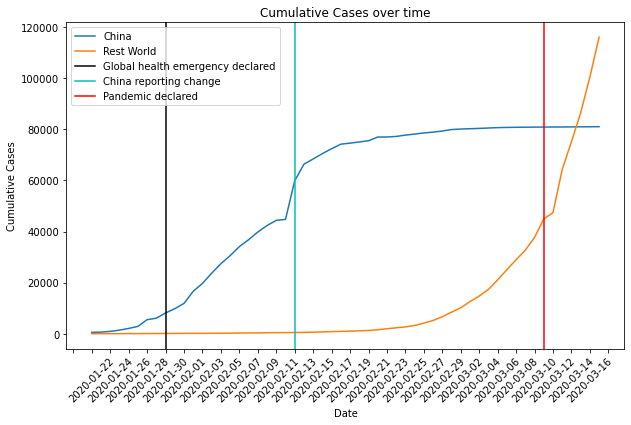

In [42]:
# Your code here

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

x1 = china_data.date
y1 = china_data.cum_cases
y2 = restworld_data.cum_cases

plt.plot(x1,y1, label='China')
plt.plot(x1,y2, label='Rest World')


colors = ['k','c','r']
for i in range(who_events.shape[0]):
    x = who_events.iloc[i].date
    lab = who_events.iloc[i].event.replace('\n', ' ')
    plt.axvline(x=x, color=colors[i], label=lab)

plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases over time')
plt.legend()

ax = plt.gca()
n = len(x1) // 20
ax.xaxis.set_major_locator(MultipleLocator(n))

plt.show()


### B2.4 Adding a trend line to China

When trying to assess how big future problems are going to be, we need a measure of how fast the number of cases is growing. A good starting point is to see if the cases are growing faster or slower than linearly.

There is a clear surge of cases around February 13, 2020, with the reporting change in China. However, a couple of days after, the growth of cases in China slows down. How can we describe COVID-19's growth in China after February 15, 2020?

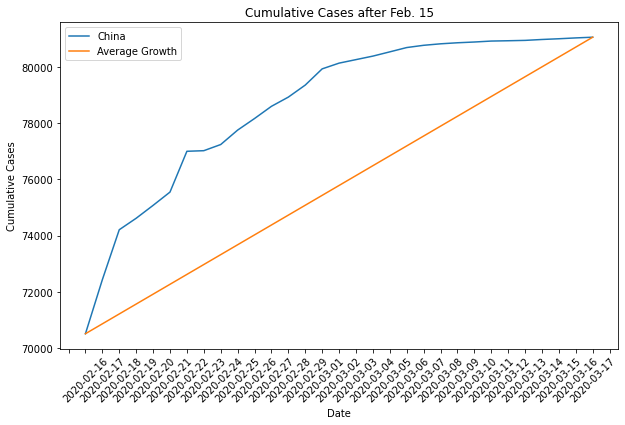

In [61]:
# Filter for China, from Feb 15
china_2 = china_data.loc[china_data['date']>'2020-02-15']

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

x = china_2['date'].tolist()
y = china_2['cum_cases'].tolist()

plt.plot(x,y, label='China')
plt.plot([x[0],x[-1]], [y[0],y[-1]], label='Average Growth')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases after Feb. 15')
plt.legend()

ax = plt.gca()
n = len(x) // 20
ax.xaxis.set_major_locator(MultipleLocator(n))

plt.show()

### B2.5 And the rest of the world?

From the plot above, the growth rate in China is slower than linear. That's great news because it indicates China has at least somewhat contained the virus in late February and early March.

How does the rest of the world compare to linear growth?

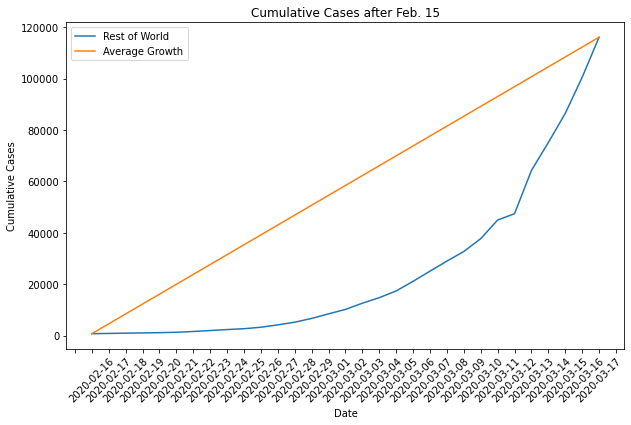

In [62]:
# Filter confirmed_cases_china_vs_world for not China
rest_world_2 = restworld_data.loc[restworld_data['date']>'2020-02-15']

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

x = rest_world_2['date'].tolist()
y = rest_world_2['cum_cases'].tolist()

plt.plot(x,y, label='Rest of World')
plt.plot([x[0],x[-1]], [y[0],y[-1]], label='Average Growth')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases after Feb. 15')
plt.legend()

ax = plt.gca()
n = len(x) // 20
ax.xaxis.set_major_locator(MultipleLocator(n))

plt.show()

### B2.6 Adding a logarithmic scale

From the plot above, we can see a straight line does not fit well at all, and the rest of the world is growing much faster than linearly. What if we added a logarithmic scale to the y-axis?

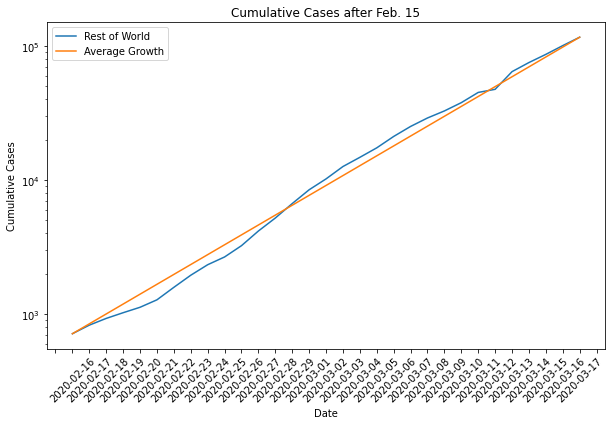

In [63]:
# Modify the plot to use a logarithmic scale on the y-axis
rest_world_2 = restworld_data.loc[restworld_data['date']>'2020-02-15']

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

x = rest_world_2['date'].tolist()
y = rest_world_2['cum_cases'].tolist()

plt.yscale('log')
plt.plot(x,y, label='Rest of World')
plt.plot([x[0],x[-1]], [y[0],y[-1]], label='Average Growth')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases after Feb. 15')
plt.legend()

ax = plt.gca()
n = len(x) // 20
ax.xaxis.set_major_locator(MultipleLocator(n))

plt.show()

### B2.7 Which countries outside of China have been hit hardest?

With the logarithmic scale, we get a much closer fit to the data. From a data science point of view, a good fit is great news. Unfortunately, from a public health point of view, that means that cases of COVID-19 in the rest of the world are growing at an exponential rate, which is terrible news.

Not all countries are being affected by COVID-19 equally, and it would be helpful to know where in the world the problems are greatest. Let's find the countries outside of China with the most confirmed cases in our dataset.

In [82]:
# Run this to get the data for each country (confirmed_cases_by_country.csv)
confirmed_cases_by_country = pd.read_csv('../data/confirmed_cases_by_country.csv')
tot_cases_by_country = confirmed_cases_by_country.groupby('country').sum().sort_values(by='cum_cases', ascending=False)
tot_cases_by_country.loc[:,['cum_cases']].head(10)


,cum_cases
country,
US,1313061
France,312488
Italy,202336
Iran,133472
"Korea, South",129476
Spain,51007
Germany,41520
United Kingdom,31914
Canada,25020


In [92]:
confirmed_cases_by_country.loc[confirmed_cases_by_country.country=='France']

,country,province,date,cases,cum_cases
163,France,France,2020-01-22,0,0
164,France,French Guiana,2020-01-22,0,0
165,France,French Polynesia,2020-01-22,0,0
171,France,Guadeloupe,2020-01-22,0,0
185,France,Mayotte,2020-01-22,0,0
...,...,...,...,...,...
13206,France,Guadeloupe,2020-03-17,12,7699
13220,France,Mayotte,2020-03-17,0,7699
13249,France,Reunion,2020-03-17,0,7699
13251,France,Saint Barthelemy,2020-03-17,0,7699


### B2.8 Plotting hardest hit countries as of Mid-March 2020

Even though the outbreak was first identified in China, there is only one country from East Asia (South Korea) in the above table. Four of the listed countries (France, Germany, Italy, and Spain) are in Europe and share borders. To get more context, we can plot these countries' confirmed cases over time.



In [122]:
# Read in the dataset from datasets/confirmed_cases_top7_outside_china.csv
confirmed_cases_top7_outside_china = pd.read_csv('../data/confirmed_cases_top7_outside_china.csv')
confirmed_cases_top7_outside_china

,country,date,cum_cases
0,Germany,2020-02-18,16
1,Iran,2020-02-18,0
2,Italy,2020-02-18,3
3,"Korea, South",2020-02-18,31
4,Spain,2020-02-18,2
...,...,...,...
2025,US,2020-03-17,6387
2026,US,2020-03-17,6387
2027,US,2020-03-17,6388
2028,US,2020-03-17,6413


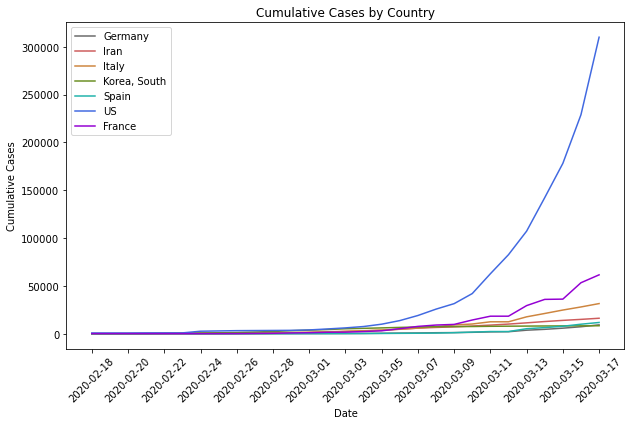

In [132]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

colors = ['dimgray', 'indianred', 'peru', 'olivedrab', 'lightseagreen', 'royalblue', 'darkviolet']
countries = confirmed_cases_top7_outside_china.country.unique()
x = confirmed_cases_top7_outside_china.date.unique()
i = 0
for c in countries:
    newdf = confirmed_cases_top7_outside_china.loc[confirmed_cases_top7_outside_china['country']==c].groupby('date').sum()
    y = newdf['cum_cases'].tolist()
    plt.plot(x,y, color=colors[i], label = c)
    i+=1

plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases by Country')
plt.legend()

ax = plt.gca()
n = len(x) // 14
ax.xaxis.set_major_locator(MultipleLocator(n))

plt.show()

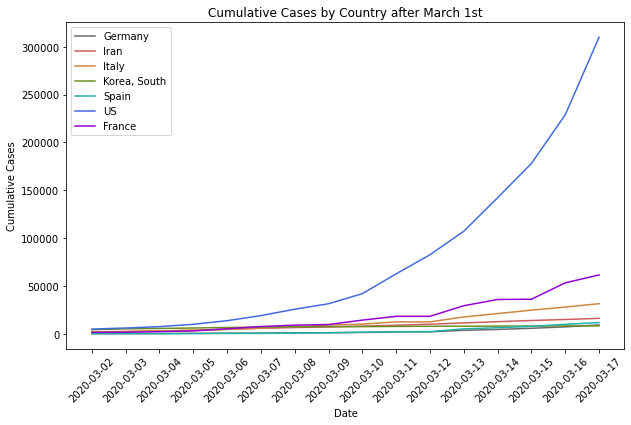

In [124]:
# FILTER TO AFTER MARCH 1

top7_2 = confirmed_cases_top7_outside_china.loc[confirmed_cases_top7_outside_china['date']>'2020-03-01']

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

colors = ['dimgray', 'indianred', 'peru', 'olivedrab', 'lightseagreen', 'royalblue', 'darkviolet']
countries = top7_2.country.unique()
x = top7_2.date.unique()
i = 0
for c in countries:
    newdf = top7_2.loc[top7_2['country']==c].groupby('date').sum()
    y = newdf['cum_cases'].tolist()
    plt.plot(x,y, color=colors[i], label = c)
    i+=1

plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases by Country after March 1st')
plt.legend()

plt.show()

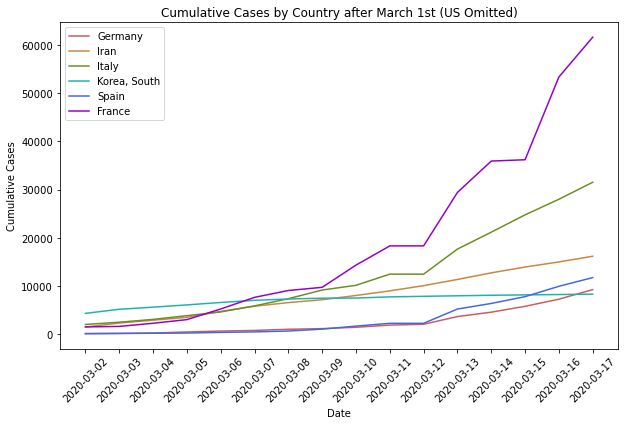

In [136]:
# LEAVE OUT THE US

top7_2 = confirmed_cases_top7_outside_china.loc[confirmed_cases_top7_outside_china['date']>'2020-03-01']
top7_3 = top7_2[top7_2.country != 'US']

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

colors = ['indianred', 'peru', 'olivedrab', 'lightseagreen', 'royalblue', 'darkviolet']
countries = top7_3.country.unique()
x = top7_3.date.unique()
i = 0
for c in countries:
    newdf = top7_2.loc[top7_2['country']==c].groupby('date').sum()
    y = newdf['cum_cases'].tolist()
    plt.plot(x,y, color=colors[i], label = c)
    i+=1

plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Cases by Country after March 1st (US Omitted)')
plt.legend()

plt.show()

## B3. Market Analysis - Frequent Pattern (25)

* The objective of this coding question is to apply data cleaning and preprocessing, implement apriori algorithm, and generate frequent itemsets.
* You are provided with a CSV file containing transaction data, where each row represents an item purchased in a transaction. You are required to use only the 'Billno' and 'Itemname' column for this task.
* Your first task is to preprocess the dataset by grouping the items purchased for each bill number.
* Then, implement apriori algorithm to find frequent itemsets based on the given threshold values for support and confidence.


### Guidelines:



* Preprocessing:

    * Read the CSV file and load it into a suitable data structure.
    * Group the items purchased for each bill number.
    * Convert all items to lowercase to ensure consistency.

* Association Mining:

    * Use the apriori algorithm for finding association rules.
    * You are allowed to use apyori or mlxtend package for this task.
    * Implement the algorithm to find frequent itemsets using support=0.03 and confidence=0.5.

* Output:

    * Print or display the frequent itemsets satisfying the support and confidence thresholds.
    * Additionally, you have to display association rules generated by the algorithm.

### Your Implementation

In [105]:
# pip install mlxtend  

In [104]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [79]:
## Read the dataset and display it ##
df = pd.read_csv('../data/MidTerm1_PartB3_Data.csv', sep=';')
df.tail()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,09.12.2011 12:50,"4,95",12680.0,France


In [80]:
pd.to_numeric(df.BillNo, 'coerce').isna().sum()

3

In [81]:
## Remove unwanted columns and change data types  ##
df2 = df.loc[:,['BillNo','Itemname']]
df2.Itemname = df2.Itemname.astype(str)

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   BillNo    522064 non-null  object
 1   Itemname  522064 non-null  object
dtypes: object(2)
memory usage: 8.0+ MB


In [83]:
## Combine the transactions and change to lowercase ##

def list_items(vec):
    lst = []
    for item in vec:
        lst.append(item.lower())
    return lst

df3 = df2.groupby('BillNo', as_index=False)['Itemname'].agg({'Items': list_items})
df3

,BillNo,Items
0,536365,"[white hanging heart t-light holder, white met..."
1,536366,"[hand warmer union jack, hand warmer red polka..."
2,536367,"[assorted colour bird ornament, poppy's playho..."
3,536368,"[jam making set with jars, red coat rack paris..."
4,536369,[bath building block word]
...,...,...
21660,572057,"[tea time oven glove, frying pan union flag, n..."
21661,572058,"[door hanger mum + dads room, baking mould ch..."
21662,A563185,[adjust bad debt]
21663,A563186,[adjust bad debt]


In [84]:
## Remove rows without information/valid Bill Numbers ##

def valid_row(billno):
    s = str(billno)
    s1 = s[0]
    if s1 == 'A':
        return False
    else:
        return True

df3['valid'] = df3.BillNo.apply(valid_row)
df3

,BillNo,Items,valid
0,536365,"[white hanging heart t-light holder, white met...",True
1,536366,"[hand warmer union jack, hand warmer red polka...",True
2,536367,"[assorted colour bird ornament, poppy's playho...",True
3,536368,"[jam making set with jars, red coat rack paris...",True
4,536369,[bath building block word],True
...,...,...,...
21660,572057,"[tea time oven glove, frying pan union flag, n...",True
21661,572058,"[door hanger mum + dads room, baking mould ch...",True
21662,A563185,[adjust bad debt],False
21663,A563186,[adjust bad debt],False


In [85]:
## Select only valid rows and change BillNo data type ##

df4 = df3[df3.valid].copy()
df4[['BillNo']] = df4[['BillNo']].apply(pd.to_numeric)
df4

,BillNo,Items,valid
0,536365,"[white hanging heart t-light holder, white met...",True
1,536366,"[hand warmer union jack, hand warmer red polka...",True
2,536367,"[assorted colour bird ornament, poppy's playho...",True
3,536368,"[jam making set with jars, red coat rack paris...",True
4,536369,[bath building block word],True
...,...,...,...
21657,572054,"[vintage cream cat food container, 6 ribbons r...",True
21658,572055,"[christmas lights 10 vintage baubles, set of 6...",True
21659,572056,[postage],True
21660,572057,"[tea time oven glove, frying pan union flag, n...",True


In [89]:
finaldf = df4.loc[:,['BillNo','Items']].copy()
finaldf

,BillNo,Items
0,536365,"[white hanging heart t-light holder, white met..."
1,536366,"[hand warmer union jack, hand warmer red polka..."
2,536367,"[assorted colour bird ornament, poppy's playho..."
3,536368,"[jam making set with jars, red coat rack paris..."
4,536369,[bath building block word]
...,...,...
21657,572054,"[vintage cream cat food container, 6 ribbons r..."
21658,572055,"[christmas lights 10 vintage baubles, set of 6..."
21659,572056,[postage]
21660,572057,"[tea time oven glove, frying pan union flag, n..."


In [92]:
## one-hot-encoding ##

all_items = set()
for i in range(finaldf.shape[0]):
    row_items = set(finaldf.iloc[i].Items)
    all_items.update(row_items)

In [96]:
encoded_vals = []
for i in range(finaldf.shape[0]):
    row_items = set(finaldf.iloc[i].Items)
    labels = {}
    uncommons = list(all_items - row_items)
    commons = list(all_items.intersection(row_items))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,set of salt and pepper toadstools,pink boudoir t-light holder,mirrored wall art skulls,number tile vintage font 8,3 gardenia morris boxed candles,pink enamel flower hair tie,red 3 piece retrospot cutlery set,set/20 strawberry paper napkins,painted metal heart with holly bell,orange pendant triple shell necklac,...,snack tray red gingham,purple foxglove artiifcial flower,sombrero,white metal lantern,red woolly hottie white heart.,glass star frosted t-light holder,cream cupid hearts coat hanger,knitted union flag hot water bottle,white hanging heart t-light holder,set 7 babushka nesting boxes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
## Apply apriori algorithm and display the results ##
ohe_df

,set of salt and pepper toadstools,pink boudoir t-light holder,mirrored wall art skulls,number tile vintage font 8,3 gardenia morris boxed candles,pink enamel flower hair tie,red 3 piece retrospot cutlery set,set/20 strawberry paper napkins,painted metal heart with holly bell,orange pendant triple shell necklac,...,snack tray red gingham,purple foxglove artiifcial flower,sombrero,white metal lantern,red woolly hottie white heart.,glass star frosted t-light holder,cream cupid hearts coat hanger,knitted union flag hot water bottle,white hanging heart t-light holder,set 7 babushka nesting boxes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
## Find frequent itemsets ##

freq_items = apriori(ohe_df, min_support=0.03, use_colnames=True, verbose=1)
freq_items.head(10)

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 18 combinations | Sampling itemset size 3e 2


,support,itemsets
0,0.039609,(jumbo bag vintage leaf)
1,0.030283,(chilli lights)
2,0.095282,(jumbo bag red retrospot)
3,0.040670,(vintage snap cards)
4,0.032176,(jumbo bag vintage doily)
5,0.037531,(set of 6 spice tins pantry design)
6,0.041455,(baking set 9 piece retrospot)
7,0.041778,(gardeners kneeling pad keep calm)
8,0.071138,(lunch bag red retrospot)
9,0.031022,(set of 3 butterfly cookie cutters)


In [114]:
## Observe the association rules ## 

rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(green regency teacup and saucer),(roses regency teacup and saucer),0.045010,0.046764,0.033746,0.749744,16.032523,0.031641,3.809038,0.981818
4,(roses regency teacup and saucer),(green regency teacup and saucer),0.046764,0.045010,0.033746,0.721619,16.032523,0.031641,3.430515,0.983625
2,(jumbo bag pink polkadot),(jumbo bag red retrospot),0.055904,0.095282,0.037808,0.676301,7.097879,0.032481,2.794932,0.909985
0,(jumbo storage bag suki),(jumbo bag red retrospot),0.054381,0.095282,0.033284,0.612054,6.423605,0.028103,2.332074,0.892880
1,(jumbo shopper vintage red paisley),(jumbo bag red retrospot),0.053827,0.095282,0.031207,0.579760,6.084670,0.026078,2.152859,0.883192
